Eccentricity (Volume Conservation)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Relevant Parameters
----------------------------


In [3]:
print(b.get_parameter(qualifier='ecc'))

Parameter: ecc@binary@component
                       Qualifier: ecc
                     Description: Eccentricity
                           Value: 0.0
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component, requiv_max@primary@component, requiv_max@secondary@component
                      Related to: t0_supconj@binary@component, period@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, ecosw@binary@component, esinw@binary@component, q@binary@component, syncpar@primary@component, sma@binary@component, incl@primary@component, long_an@primary@component, incl@binary@component, long_an@binary@component, requiv_max@primary@component, syncpar@secondary@component, incl@secondary@component, long_an@secondary@component, requiv_max@secondary@component



In [4]:
print(b.get_parameter(qualifier='ecosw', context='component'))

Parameter: ecosw@binary@component
                       Qualifier: ecosw
                     Description: Eccentricity times cos of argument of periastron
                           Value: 0.0
                  Constrained by: ecc@binary@component, per0@binary@component
                      Constrains: esinw@binary@component
                      Related to: ecc@binary@component, per0@binary@component, esinw@binary@component



In [5]:
print(b.get_parameter(qualifier='esinw', context='component'))

Parameter: esinw@binary@component
                       Qualifier: esinw
                     Description: Eccentricity times sin of argument of periastron
                           Value: 0.0
                  Constrained by: ecc@binary@component, per0@binary@component
                      Constrains: ecosw@binary@component
                      Related to: ecc@binary@component, per0@binary@component, ecosw@binary@component



Relevant Constraints
-----------------------------

In [6]:
print(b.get_parameter(qualifier='ecosw', context='constraint'))

Constrains (qualifier): ecosw
Expression in solar units (value): {ecc@binary@component} * (cos({per0@binary@component}))
Current Result (result): 0.0


In [7]:
print(b.get_parameter(qualifier='esinw', context='constraint'))

Constrains (qualifier): esinw
Expression in solar units (value): {ecc@binary@component} * (sin({per0@binary@component}))
Current Result (result): 0.0


Influence on Meshes (volume conservation)
----------------------------


In [8]:
b.add_dataset('mesh', times=np.linspace(0,1,11), columns=['volume'])

Wed, 30 Sep 2020 11:55 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: figure, dataset, constraint, compute>

In [9]:
b.set_value('ecc', 0.2)

In [10]:
b.run_compute()

100%|██████████| 11/11 [00:00<00:00, 14.82it/s]


<ParameterSet: 113 parameters | components: primary, secondary>

In [11]:
print(b['volume@primary@model'])

ParameterSet: 11 parameters
R  00.000000@volume@primary@la...: 4.188790204786393 solRad3
R  00.100000@volume@primary@la...: 4.188790204786389 solRad3
R  00.200000@volume@primary@la...: 4.18879020478639 solRad3
R  00.300000@volume@primary@la...: 4.188790204786391 solRad3
R  00.400000@volume@primary@la...: 4.188790204786391 solRad3
R  00.500000@volume@primary@la...: 4.188790204786391 solRad3
R  00.600000@volume@primary@la...: 4.188790204786386 solRad3
R  00.700000@volume@primary@la...: 4.188790204786391 solRad3
R  00.800000@volume@primary@la...: 4.18879020478639 solRad3
R  00.900000@volume@primary@la...: 4.1887902047863905 solRad3
R  01.000000@volume@primary@la...: 4.188790204786393 solRad3


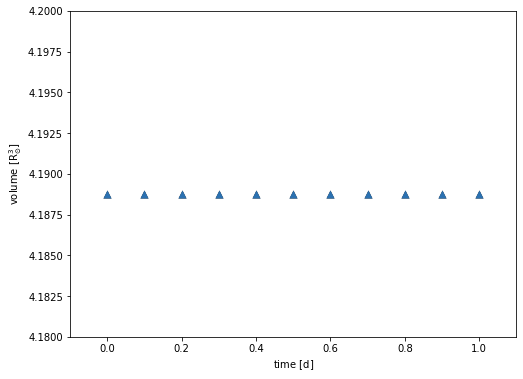

In [12]:
afig, mplfig = b['mesh01'].plot(x='times', y='volume', ylim=(4.18, 4.20), show=True)

In [13]:
b.remove_dataset('mesh01')

<ParameterSet: 122 parameters | contexts: dataset, constraint, model, compute>

Influence on Radial Velocities
----------------------------------


In [14]:
b.add_dataset('rv', times=np.linspace(0,1,51))

<ParameterSet: 81 parameters | contexts: figure, dataset, constraint, compute>

In [15]:
b.run_compute()

Wed, 30 Sep 2020 11:55 BUNDLE       WARNING overwriting model: latest
100%|██████████| 51/51 [00:03<00:00, 13.93it/s]


<ParameterSet: 5 parameters | components: primary, secondary>

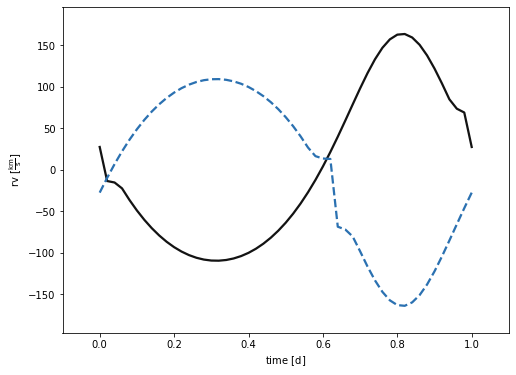

In [16]:
afig, mplfig = b['rv@model'].plot(show=True)

In [17]:
b.remove_dataset('rv01')

<ParameterSet: 51 parameters | contexts: model, compute, figure, dataset, constraint>

Influence on Light Curves (fluxes)
-----------------------------------------


In [18]:
b.add_dataset('lc', times=np.linspace(0,1,51))

<ParameterSet: 78 parameters | contexts: figure, dataset, constraint, compute>

In [19]:
b.run_compute()

Wed, 30 Sep 2020 11:55 BUNDLE       WARNING overwriting model: latest
100%|██████████| 51/51 [00:03<00:00, 14.50it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

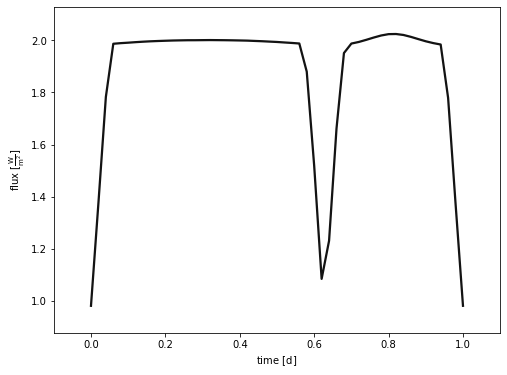

In [20]:
afig, mplfig = b['lc@model'].plot(show=True)